In [2]:
%matplotlib inline
import itertools
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import io, transform
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7

c:\users\prashanth\anaconda3\envs\tensorflow-gpu\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


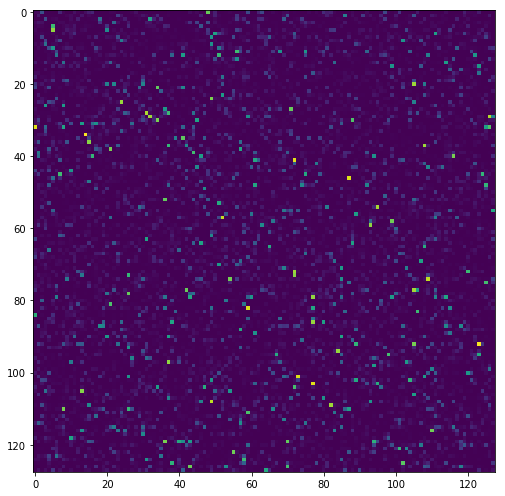

In [3]:
# Input size
train_size = 128
# Scaled up size
test_size = 1000
image_path = 'batch_output_100/11.png'
image = transform.resize(io.imread(image_path), (train_size, train_size))
image = image if len(image.shape) < 3 or image.shape[2] == 3 else image[:,:,:3]
io.imshow(image)
X = tf.placeholder('float32', (None, 2))

In [4]:
# This particular example utilizes 16 layers, however only 4 were used to scale up the charizard image
# Learns a mapping of (x,y) co-ordinate to RGB color value. Performs poorly on galaxy images due to the lack of color information
def model(X, w):
    h1 = tf.nn.tanh(tf.matmul(X, w['h1']))
    h2 = tf.nn.tanh(tf.matmul(h1, w['h2']))
    h3 = tf.nn.tanh(tf.matmul(h2, w['h3']))
    h4 = tf.nn.tanh(tf.matmul(h3, w['h4']))
    h5 = tf.nn.tanh(tf.matmul(h4, w['h5']))
    h6 = tf.nn.tanh(tf.matmul(h5, w['h6']))
    h7 = tf.nn.tanh(tf.matmul(h6, w['h7']))
    h8 = tf.nn.tanh(tf.matmul(h7, w['h8']))
    h9 = tf.nn.tanh(tf.matmul(h8, w['h8']))
    h10 = tf.nn.tanh(tf.matmul(h9, w['h8']))
    h11 = tf.nn.tanh(tf.matmul(h10, w['h8']))
    h12 = tf.nn.tanh(tf.matmul(h11, w['h8']))
    h13 = tf.nn.tanh(tf.matmul(h12, w['h8']))
    h14 = tf.nn.tanh(tf.matmul(h13, w['h8']))
    h15 = tf.nn.tanh(tf.matmul(h14, w['h8']))
    h16 = tf.nn.tanh(tf.matmul(h15, w['h8']))
    
    return tf.nn.sigmoid(tf.matmul(h16, w['out']))

def init_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.1))

Y = tf.placeholder("float32", (None, None))

w = {
  'h1': init_weights([2, 20]),
  'h2': init_weights([20, 20]),
  'h3': init_weights([20, 20]),
  'h4': init_weights([20, 20]),
  'h5': init_weights([20, 20]),
  'h6': init_weights([20, 20]),
  'h7': init_weights([20, 20]),
  'h8': init_weights([20, 20]),
  'h9': init_weights([20, 20]),
  'h10': init_weights([20, 20]),
  'h11': init_weights([20, 20]),
  'h12': init_weights([20, 20]),
  'h13': init_weights([20, 20]),
  'h14': init_weights([20, 20]),
  'h15': init_weights([20, 20]),
  'h16': init_weights([20, 20]),
  'out': init_weights([20, 3]),
}

out = model(X, w)

cost = tf.reduce_mean(tf.squared_difference(out, Y))
train_op = tf.train.AdamOptimizer().minimize(cost)


In [5]:
n_epochs = 100000

generate_coord = lambda size: (np.array(list(itertools.product(np.linspace(0,1,size),np.linspace(0,1,size)))).reshape(size ** 2, 2))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    x = generate_coord(train_size)
    reshaped_image = np.array(image.reshape(train_size ** 2, -1))
    for epoch in range(int(n_epochs + 1)):
        _, c = sess.run([train_op, cost], feed_dict={X: x, Y: reshaped_image})
        if epoch % (n_epochs/10) == 0:
            print('{:0.0%} \t Loss: {}'.format(epoch/n_epochs, c).expandtabs(7))
    new_image = sess.run(out, feed_dict={X: generate_coord(test_size)})

0%      Loss: 0.100209541618824
10%     Loss: 0.0040006209164857864
20%     Loss: 0.0039695207960903645
30%     Loss: 0.004002332221716642
40%     Loss: 0.003954457584768534
50%     Loss: 0.0039011731278151274
60%     Loss: 0.003914611879736185
70%     Loss: 0.003920414485037327
80%     Loss: 0.0039483532309532166
90%     Loss: 0.0038545378483831882
100%    Loss: 0.003937355242669582


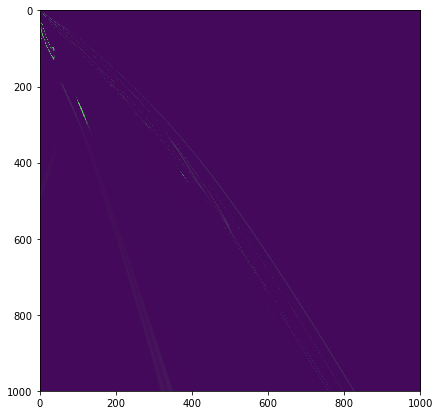

In [6]:
plt.imshow(new_image.reshape(test_size, test_size, -1)) # 100000 epochs

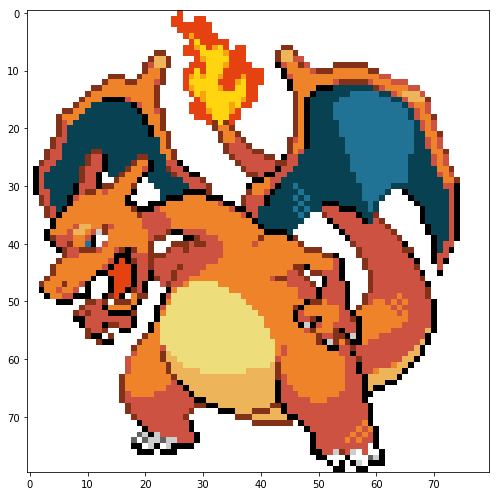

In [4]:
image_path = 'charizard.png'
io.imshow(image_path)

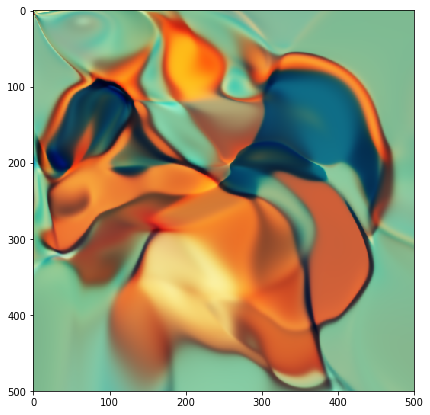

In [31]:
plt.imshow(new_image.reshape(test_size, test_size, -1)) # 100000 epochs